# Métodos Hierárquicos

In [7]:
# numpy for mathematics
import numpy as np

# pandas for data science
import pandas as pd

# matplotlib for plotting
from matplotlib import pyplot as plt

from auxiliary_func import *


## Processamento do Ficheiro

Lê-se o ficheiro de dados tratado, constrói-se o conjunto de variáveis categóricas e contínuas. Define-se o conjunto de variáveis explicativas e resposta.

In [13]:
from sklearn.impute import KNNImputer

df = pd.read_csv("MI.csv", header=None, index_col=0)
df = df.replace("?", np.nan)
df.drop(df.loc[:, 112:114], axis=1, inplace=True)
df.drop(df.loc[:, 116:123], axis=1, inplace=True)

Cols50pc = df.isna().sum().apply(lambda x: x > 850)
lessThan50pc = list(Cols50pc[Cols50pc == True].index)

# Delete colums with 30% of missing values
df.drop(df[lessThan50pc], axis=1, inplace=True)

continuous_ind = list(set([1, 34, 35, 36, 37, 83, 85, 86,
                      87, 88, 89, 90]) - set(lessThan50pc))  # Labels contínuas (obtidas do site)

categorical_ind = list(set(df.columns) - set(continuous_ind))

df_cont = pd.DataFrame()  # Data Frame contínuo
df_cat = pd.DataFrame()  # Data Frame categórico

cols = df.columns

imputer = KNNImputer(n_neighbors=1)
df = imputer.fit_transform(df)

df = pd.DataFrame(df, columns=cols)

j = 0  # Construction of data frames
for i in continuous_ind:
    df_cont.insert(j, i, df.loc[:, i])
    j = j + 1
j = 0
for i in categorical_ind:
    df_cat.insert(j, i, df.loc[:, i])
    j = j + 1


In [14]:


X = df.drop(115, axis=1)

X_cat = df_cat.drop(labels={115}, axis=1)

X_cont = df_cont

target = df[[115]]


## Análise

Grande parte são variáveis categóricas e binárias.

Consideramos três distâncias conforme faz mais sentido:

Normal - Euclideana

Hamming - Boa para binários

Gower - Parece fixe

Novamente há várias coisas a testar:

- Retirar as contínuas
    - Investigar normalmente 
    - Investigar com dimensionalidade reduzida
    - Investigar com One-Hot - Distância de Normal / Hamming / Gower 
    - Investigar com One-Hot e com dimensionalidade reduzida - Distância de Normal/ Hamming / Gower
- Não retirar contínuas
    - Investigar normalmente (Pá deve ser mt mau)
    - Fazer scaling (também há várias hipóteses)
    - Usar dimensionalidade reduzida
- Só contínuas


### Funções auxiliares

In [135]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering


def silhouette_score_list(X, affinity="euclidean", linkage="ward"):
    silhouette_scores = []

    n = [2, 3, 4, 5, 6, 7]

    for n_cluster in n:
        silhouette_scores.append(
            silhouette_score(X, AgglomerativeClustering(n_clusters=n_cluster, affinity = affinity, linkage = linkage).fit_predict(X)))

    plt.bar(n, silhouette_scores)
    plt.xlabel('Número Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

def pca_visualization2D(X, n_clusters, affinity = "euclidean", linkage = "ward"):
    
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    plt.scatter(X_pca[:,0], X_pca[:,1],
                c=AgglomerativeClustering(n_clusters=n_clusters, affinity=affinity, linkage=linkage).fit_predict(X_pca), cmap=plt.cm.autumn)

    plt.show()


### Clustering aglomerativo só com scaling normal

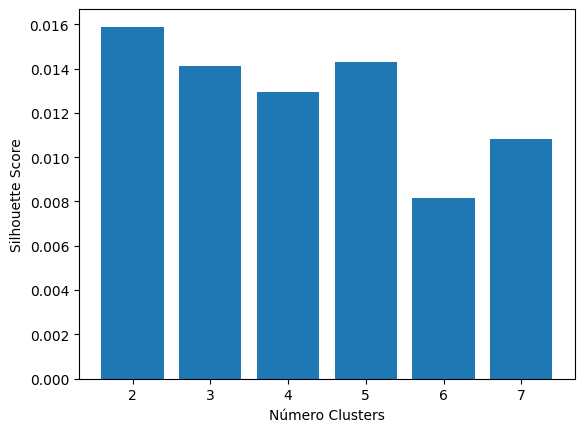

In [136]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

normalized_X = normalize(scaled_X)

silhouette_score_list(normalized_X)


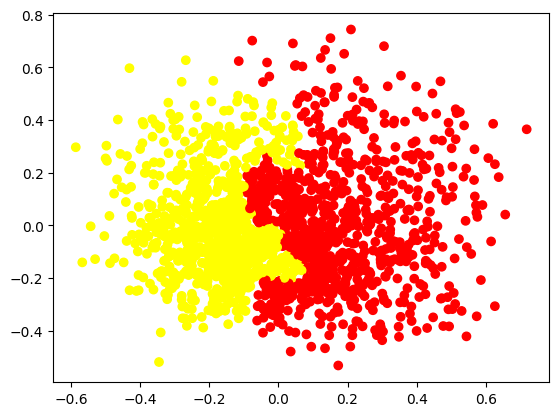

In [149]:
pca_visualization2D(normalized_X, 2)


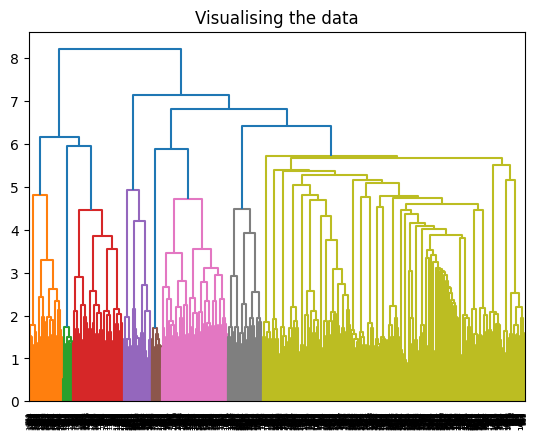

In [150]:

Dendrogram = shc.dendrogram((shc.linkage(normalized_X, method='ward')))


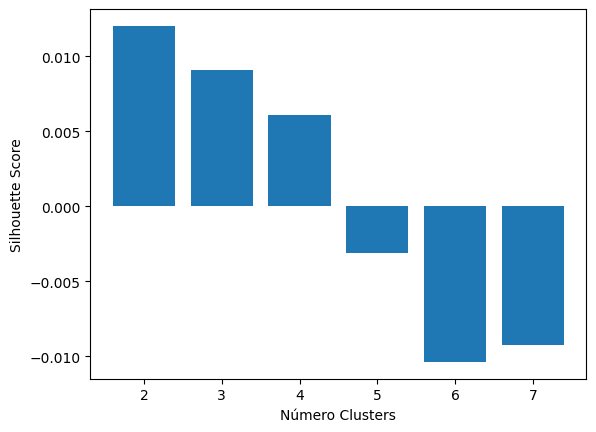

In [151]:
silhouette_score_list(normalized_X, linkage="complete")


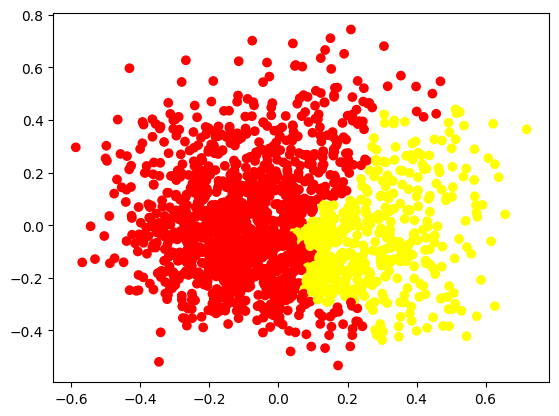

In [156]:
pca_visualization2D(normalized_X, 2, linkage = "complete")

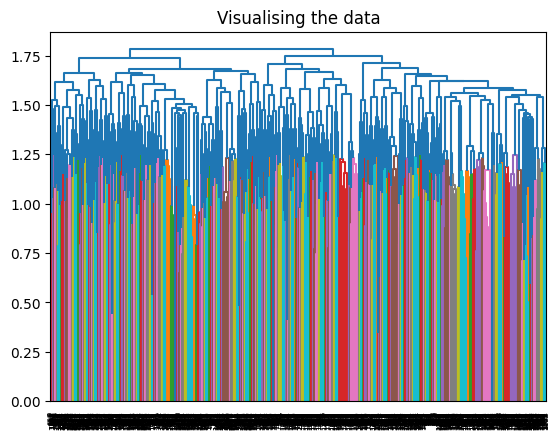

In [157]:

Dendrogram = shc.dendrogram((shc.linkage(normalized_X, method='complete')))


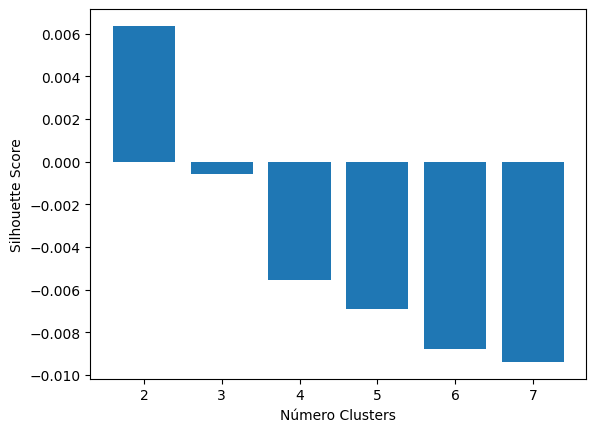

In [158]:
silhouette_score_list(normalized_X, linkage="single")


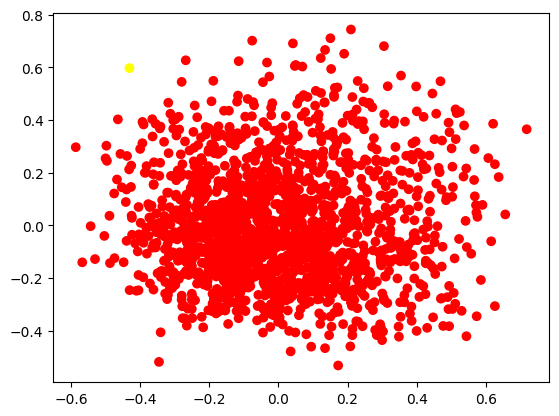

In [159]:
pca_visualization2D(normalized_X, 2, linkage="single")


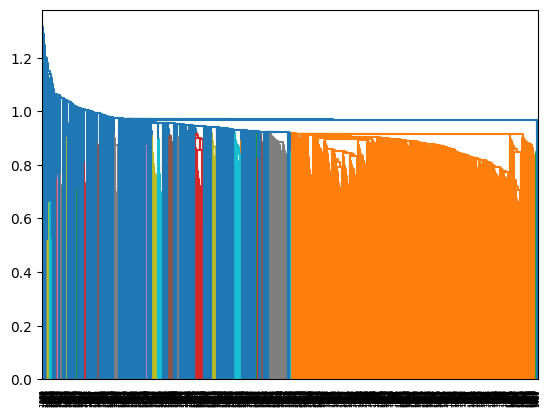

In [160]:
Dendrogram = shc.dendrogram((shc.linkage(normalized_X, method='single')))
